## load trees into dataframes and igraph

In [2]:
import sparse
import numpy as np
import pandas as pd
import igraph as ig

In [3]:
df = pd.read_csv('../../../share/trees/tree_B10_cycle_030405.csv').astype(np.float32)
df

,id,parent_id,cycle,flowering_week,nb_fruits,ancestor_is_apical,nature,ancestor_nature,nb_inflos,is_apical,appearance_month
0,0.0,NaN,3.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,NaN
1,1.0,0.0,3.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
2,2.0,1.0,3.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
3,3.0,2.0,3.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
4,4.0,3.0,3.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1442,1442.0,1411.0,5.0,NaN,0.0,1.0,0.0,2.0,0.0,0.0,8.0
1443,1443.0,1404.0,5.0,5.0,1.0,1.0,2.0,2.0,1.0,0.0,8.0
1444,1444.0,1404.0,5.0,5.0,0.0,1.0,1.0,2.0,1.0,0.0,8.0
1445,1445.0,1406.0,5.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0


In [3]:
# igraph expects this ordering
tree_df = df[['parent_id', 'id']].dropna()
tree_df

,parent_id,id
1,0.0,1.0
2,1.0,2.0
3,2.0,3.0
4,3.0,4.0
5,2.0,5.0
...,...,...
1442,1411.0,1442.0
1443,1404.0,1443.0
1444,1404.0,1444.0
1445,1406.0,1445.0


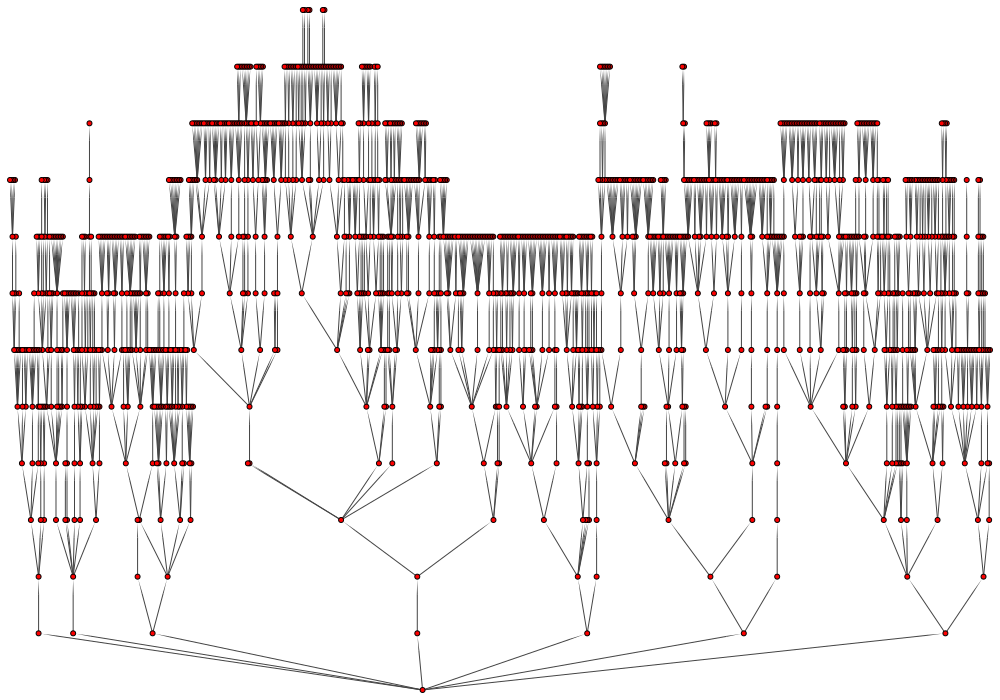

In [4]:
g = ig.Graph.DataFrame(tree_df)
assert g.is_dag()
l = g.layout_reingold_tilford()
l.rotate(180)
ig.plot(g, layout=l, bbox=(1000, 700), margin=(10, 10, 10, 10), **{
    'vertex_size': 5,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1
})